In [1]:
# Importing required libraries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the tabular form dataset, that we created earlier in the file named "Extracting_Image_Features_into_Tabular_Data.ipynb"
# We also drop the useless column 'Unnamed:0'

data = pd.read_csv('tabular_data.csv')
data = data.drop(['Unnamed: 0'], axis = 1)

In [3]:
# Let's look at the head of the data

data.head()

area0    area1    area2  area3  area4    diagnosis
0    113.0  15160.0      0.0    0.0    0.0  Parasitized
1    163.5  18954.0      0.0    0.0    0.0  Parasitized
2     85.0     29.5  15201.0    0.0    0.0  Parasitized
3     46.0    196.0  13745.0    0.0    0.0  Parasitized
4  13593.0      0.0      0.0    0.0    0.0  Parasitized

# Data PreProcessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27558 entries, 0 to 27557
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area0      27558 non-null  float64
 1   area1      27558 non-null  float64
 2   area2      27558 non-null  float64
 3   area3      27558 non-null  float64
 4   area4      27558 non-null  float64
 5   diagnosis  27558 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.3+ MB


In [5]:
# We see that there are no NULL values
# We need to convert the column 'diagnosis' into a numerical type

In [6]:
diagnosis_types = {"Parasitized": 0, "Uninfected": 1}
data['diagnosis'] = data['diagnosis'].map(diagnosis_types)

In [7]:
# Let's check for any missing values in our data

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

Total    %
diagnosis      0  0.0
area4          0  0.0
area3          0  0.0
area2          0  0.0
area1          0  0.0
area0          0  0.0

In [9]:
# We can try to normalize our data.

from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data.columns = ["area0", "area1", "area2", "area3", "area4", "diagnosis"]

In [10]:
data.head()

area0     area1     area2  area3  area4  diagnosis
0  0.003734  0.382437  0.000000    0.0    0.0        0.0
1  0.005402  0.478147  0.000000    0.0    0.0        0.0
2  0.002809  0.000744  0.444084    0.0    0.0        0.0
3  0.001520  0.004944  0.401548    0.0    0.0        0.0
4  0.449148  0.000000  0.000000    0.0    0.0        0.0

In [11]:
# Our data looks good now.

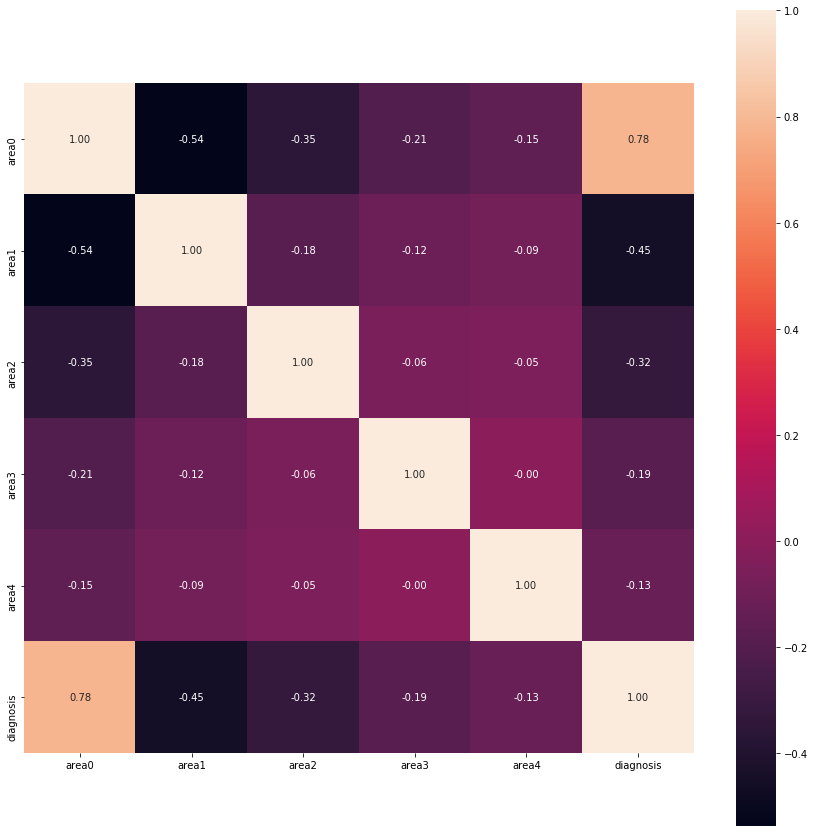

In [12]:
# We well now look at the correlations between various variables involved

import seaborn as sns

names = data.columns
plt.subplots(figsize=(15, 15))
top_corr_features = data.corr().index
sns.heatmap(data[top_corr_features].corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=names, xticklabels=names)

In [13]:
# There doesn't seems to be a problem of strong collinearity among the predictor variables.

# Building ML Models

In [14]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Accuracy Metric
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [15]:
# Now, we split our data into training and testing data.

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(['diagnosis'], axis=1)
Y = data['diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state= 0)

In [17]:
# Stochastic Gradient Descent (SGD) learning

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

acc_sgd_train = round(sgd.score(X_train, Y_train) * 100, 2)
print(round(acc_sgd_train,2,), "%")

Y_pred = sgd.predict(X_test)
acc_sgd_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_sgd_test,2,), "%")

cv_scores_sgd = cross_val_score(sgd, X_train, Y_train, cv=5)*100
print(round(np.mean(cv_scores_sgd),2),'%')

89.99 %
90.13 %
90.01 %


In [18]:
# Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

acc_random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_random_forest_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_random_forest_test,2,), "%")

cv_scores_random_forest = cross_val_score(random_forest, X_train, Y_train, cv=5)*100
print(round(np.mean(cv_scores_random_forest),2),'%')

98.14 %
86.25 %
86.22 %


In [19]:
# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

acc_log_train = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log_train,2,), "%")

Y_pred = logreg.predict(X_test)
acc_log_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_log_test,2,), "%")

cv_scores_log = cross_val_score(logreg, X_train, Y_train, cv=5)*100
print(round(np.mean(cv_scores_log),2),'%')

90.07 %
90.28 %
90.07 %


In [20]:
# K-Nearest Neighbour

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

acc_knn_train = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn_train,2,), "%")

Y_pred = knn.predict(X_test)
acc_knn_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_knn_test,2,), "%")

cv_scores_knn = cross_val_score(knn, X_train, Y_train, cv=5)*100
print(round(np.mean(cv_scores_knn),2),'%')

91.83 %
87.94 %
87.84 %


In [21]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

acc_gaussian_train = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_gaussian_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_gaussian_test,2,), "%")

cv_scores_gaussian = cross_val_score(gaussian, X_train, Y_train, cv=5)*100
print(round(np.mean(cv_scores_gaussian),2),'%')

86.27 %
86.25 %
86.27 %


In [22]:
# Perceptron

perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, Y_train)

acc_perceptron_train = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_perceptron_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_perceptron_test,2,), "%")

cv_scores_perceptron = cross_val_score(perceptron, X_train, Y_train, cv=5)*100
print(round(np.mean(cv_scores_perceptron),2),'%')

85.65 %
86.25 %
80.54 %


In [23]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

acc_linear_svc_train = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_linear_svc_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_linear_svc_test,2,), "%")

cv_scores_linear_svc = cross_val_score(linear_svc, X_train, Y_train, cv=5)*100
print(round(np.mean(cv_scores_linear_svc),2),'%')

90.07 %
86.25 %
90.06 %


In [24]:
# It is important to note here that when the data was not normalized, linearSVC was not converging even with high max_iter value,
# however with a normalized data, the problem becomes more well-conditioned for the algorithm.

In [25]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

acc_decision_tree_train = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree_train,2,), "%")

Y_pred = random_forest.predict(X_test)
acc_decision_tree_test = round(accuracy_score(Y_test,Y_pred)*100,2)
print(round(acc_decision_tree_test,2,), "%")

cv_scores_decision_tree = cross_val_score(decision_tree, X_train, Y_train, cv=5)*100
print(round(np.mean(cv_scores_decision_tree),2),'%')

98.14 %
86.25 %
83.27 %


In [26]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score_train': [acc_linear_svc_train, acc_knn_train, acc_log_train, 
              acc_random_forest_train, acc_gaussian_train, acc_perceptron_train, 
              acc_sgd_train, acc_decision_tree_train],
    'Score_test': [acc_linear_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, acc_perceptron_test, 
              acc_sgd_test, acc_decision_tree_test],
    'Score_mean5CV': [np.mean(cv_scores_linear_svc), np.mean(cv_scores_knn), np.mean(cv_scores_log), 
              np.mean(cv_scores_random_forest), np.mean(cv_scores_gaussian), np.mean(cv_scores_perceptron), 
              np.mean(cv_scores_sgd), np.mean(cv_scores_decision_tree)]})
result_df = results.sort_values(by='Score_mean5CV', ascending=False)
result_df = result_df.set_index('Score_mean5CV')
result_df.head(9)

Model  Score_train  Score_test
Score_mean5CV                                                     
90.070766             Logistic Regression        90.07       90.28
90.057159         Support Vector Machines        90.07       86.25
90.011799      Stochastic Gradient Decent        89.99       90.13
87.843611                             KNN        91.83       87.94
86.274167                     Naive Bayes        86.27       86.25
86.215191                   Random Forest        98.14       86.25
83.266803                   Decision Tree        98.14       86.25
80.544850                      Perceptron        85.65       86.25

In [ ]:
# We can see that the Logistic Regression performs the best among all models we fit, across 'Score_mean5CV' and 'Score_test' 
# accuracy scores.

In [55]:
# It is interesting to note that Random Forest and Decision Tree models overfit our data, because they have a highest 
# (almost perfect) accuracy on training set, but doesn't perform very well on the testing set.

In [56]:
# So, we will choose Logistic Regression as our final model. Now, we will tune its hyperparameters.

# Hyperparameter Tuning

In [66]:
param_grid = { "solver" : ['newton-cg', 'lbfgs', 'liblinear'], "penalty" : ['l2'], "C" : [100, 10, 1.0, 0.1, 0.01]}

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

rf = LogisticRegression()

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

clf.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=0,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [67]:
clf.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [68]:
# Running a tuned Random Forest model

logreg_tuned = LogisticRegression(C= 100, penalty = 'l2', solver = 'newton-cg')

logreg_tuned.fit(X_train, Y_train)
Y_pred = logreg_tuned.predict(X_test)

print("accuracy on training set:", logreg_tuned.score(X_train, Y_train)*100, "%")

print("accuracy on testing set:", accuracy_score(Y_test, Y_pred)*100, "%")

cv_scores_log_tuned = cross_val_score(logreg_tuned, X_train, Y_train, cv=5)*100
print("mean5CV:", round(np.mean(cv_scores_log_tuned),2),'%')

accuracy on training set: 90.07529710605098 %
accuracy on testing set: 90.27576197387518 %
mean5CV: 90.07 %


In [69]:
# We can see not much change in the accuracy across all three metrics, after tuning.

# Evaluation of a Final Model

In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(logreg_tuned, X_train, Y_train, cv=5)
confusion_matrix(Y_train, predictions)

array([[9927, 1149],
       [1041, 9929]], dtype=int64)

In [71]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8962809171330565
Recall: 0.9051048313582498


In [72]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.9006712626995647

In [73]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = logreg_tuned.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

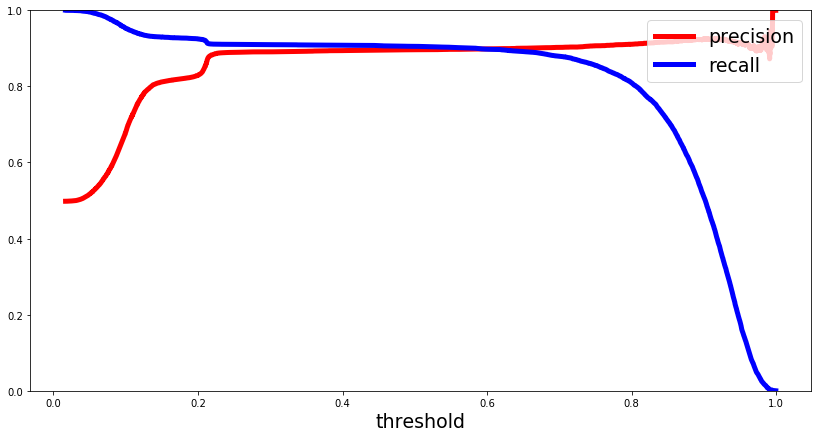

In [74]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

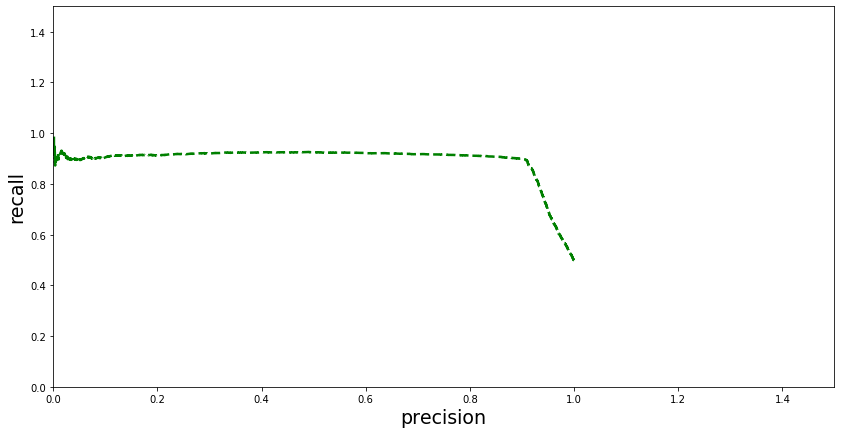

In [75]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [76]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

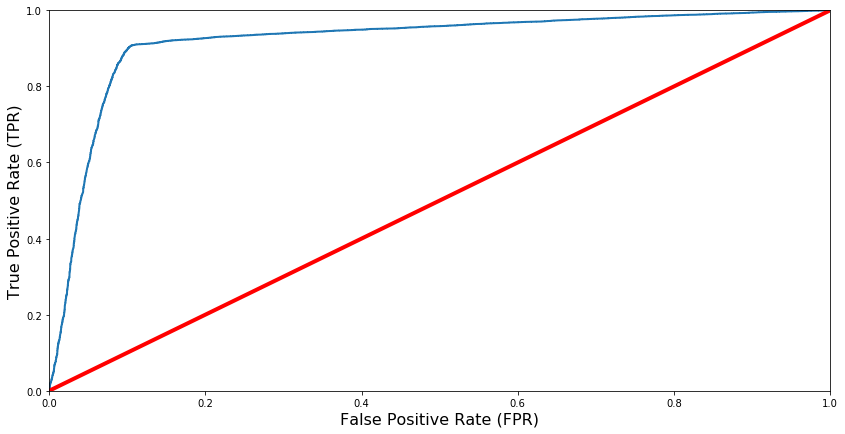

In [77]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9190187510308326


In [79]:
# ROC-AUC-Score means the area under the ROC curve. It represents the area under the blue curve. The red curve represents a
# completely random classifier (bad classifier). Now since the ROC-AUC-Score is quite close to 1 (an excellent classifier), our
# model does a pretty good job at classifying the human cells into "Parasitized" or "Uninfected" classes.